# Exploratory Data Analysis

탐색적 데이터 분석을 통해 데이터를 통달해봅시다. with Titanic Data

1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [3]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# data는 `./datasets/train.csv`에 있음
# 데이터 불러오기

titanic_df = pd.read_csv("./datasets/train.csv")

## 1. 분석의 목적과 변수 확인
- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [5]:
# 상위 5개 데이터 확인하기
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 각 colimn의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기
- 데이터 전체 정보를 얻는 함수
- `.describe()` 사용
- 수치형 데이터에 대한 요약만을 제공!

In [8]:
## 데이터 전체 정보를 얻는 함수

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 상관계수
- Correlation is NOT Causation
- 상관성: A up, B up, ...
- 인과성: A -> B (종속관계)
- 인과성을 이야기하는 것이 아님
- 상관성!!!!!!!!!

In [10]:
## 상관계수 확인!

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
## 결측치 확인

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치가 있을 때는 결측치를 어떻게 할 것인지 방법이 많다.

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column
- 생존자, 사망자의 수는?

In [12]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- `survived` Column을 확인하면 되겠다.

In [13]:
titanic_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

- 통계함수를 적용하여 더 예쁘게 보자

In [14]:
titanic_df['Survived'].sum()

342

- 생존자는 342명이다. (1이 생존자기 때문)

In [15]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- `.value_counts()`를 사용하여 각각의 값 마다 count를 알 수 있다

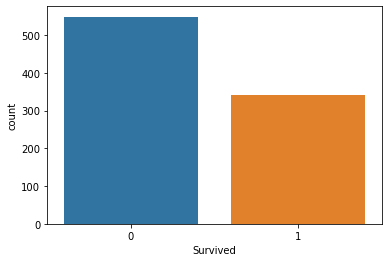

In [16]:
## 생존자 수와 사망자 수를 Barplot으로 그려보기
## sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

- Pcalss에 따른 생존 인원 파악

In [20]:
titanic_df[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


- Pclass에 따른 인원파악을 할 것이기 때문에 `.groupby`를 해준다.

In [22]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


- Pclass에 해당하는 각각의 인원을 나타냄

In [23]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- 이렇게도 가능하겠다.

-> 그럼 생존자 인원은 어떻게 알 수 있을까?

In [25]:
## 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


- 각 Pclass에 대한 Survived의 값을 모두 더했다.
- Survived의 생존자는 1의 값을 갖고 있으므로 위 숫자는 Pclass에 대한 생존자 수를 나타낸다.

In [26]:
## 생존자 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- `mean()` 평균이 의미하는 것이 생존자/전체숫자를 의미한다.

[]

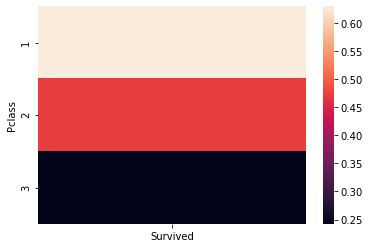

In [28]:
## 히트맵을 활용한 시각화

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### III. Sex

- 성별에 대한 생존인원 파악

In [29]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


- 성별로 묶어준다.

In [33]:
titanic_df[['Sex', 'Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


- 성별을 `count`를 했기 때문에 성별에 대한 전체 인원을 의미한다.

In [34]:
titanic_df[['Sex', 'Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


- 성별에 대한 생존자를 모두 더했기 때문에 성별에 대한 생존 인원을 의미한다.

In [36]:
titanic_df.groupby(['Survived', 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

- 모든 속성에 대해서 Survived와 Sex의 속성으로 묶고 숫자를 셌다.

In [37]:
titanic_df.groupby(['Survived', 'Sex'])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

- Survived Column 만을 이용하여 생존자 수와 성별의 각각의 경우에 대해 count를 해주었다.
- 1이면서 female은 생존했으며, 여성인 경우를 말한다.

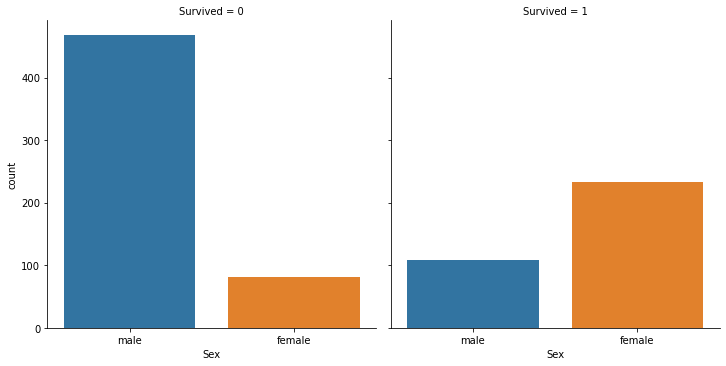

In [39]:
## sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### IV. Age
#### Remind: 결측치가 존재했다!!!!!!!!!!!
- 처리를 잘해야 한다.

In [41]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- Age에 관련된 부분의 수치를 뽑았다.

#### subplot
- 여러개의 plot을 한번에 보여주는 plot
- (1, 1) 가로에는 1개 세로에는 1개
- figure(도면) -> axis(x, y축의 틀) -> plot(그 위에 그려준다)
- ax를 이용하여 한 도면에 그래프 두 개를 그릴 것이다

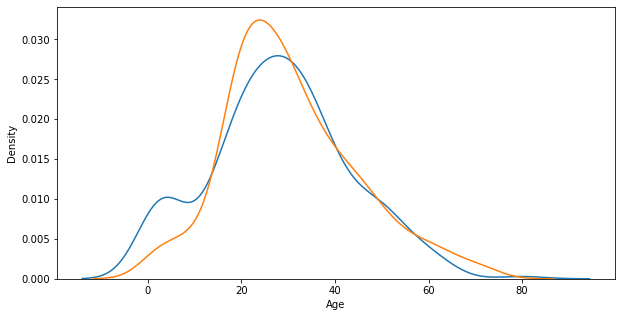

In [43]:
## survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived']==1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'], ax=ax)

plt.show()

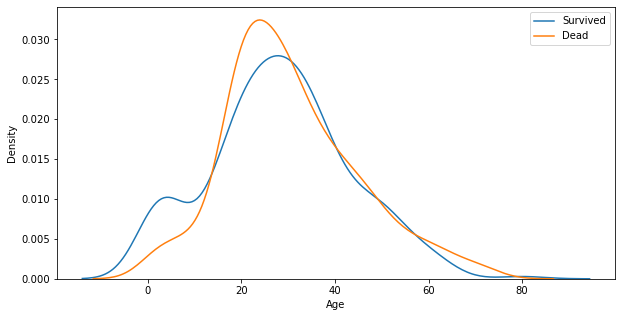

In [44]:
## survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df['Survived']==1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

- **insight !**
    - 어린아이들의 경우는 생존의 경우가 더 많았다.
    - 청년의 경우 죽음의 경우가 더 많았다

### Appendix I. Sex + Pclass vs Survived
- 복합적 요소에 대한 관계성 찾기

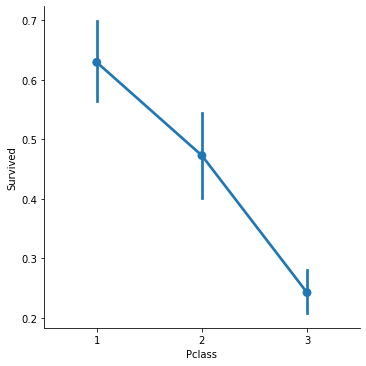

In [45]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)

plt.show()

- point plot의 경우 Pclass와 Survived의 추정치를 그려준다.
- 막대는 신뢰구간을 의미한다.
- 1에 가까울 수록 생존할 가능성이 크다

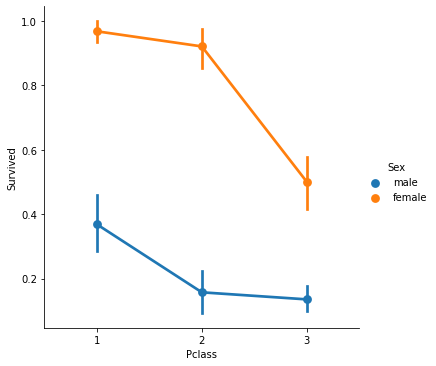

In [46]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)

plt.show()

- hue를 통하여 범주를 Sex로 나누어 그래프가 두 개가 되었다.
- Pclass가 1, 2 이면서 여성인 경우 1에 가깝다.
- 반대의 경우 Pclass 2, 3이면서 남성인 경우 0에 가깝다.

### Appendix II. Age + Pclass

In [47]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

- Pclass가 1인 사람들의 나이를 의미한다.

<AxesSubplot:ylabel='Density'>

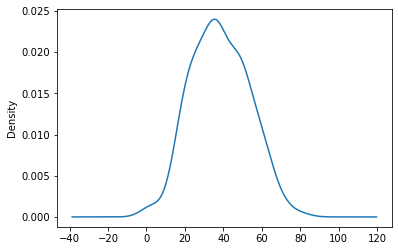

In [49]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')

- 바로 plot을 적용하여 그래프를 그려줄 수 있다.
- 그래프 유형은 kde이다.

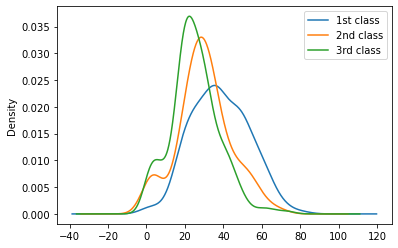

In [51]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

- 이렇게 세 번 반복하면 Pclass 별 나이 그래프를 그릴 수 있다.
- **insight**
    - 나이가 많을 수록 Pclass가 증가한다!

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.
함께 보면 좋은 라이브러리 document
- numpy
- pandas
- seaborn
- matplotlib

무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:

1. 데이터를 톺아봅시다.
- 각 데이터는 어떤 자료형을 가지고 있나요?
- 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?
- 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding

2. 데이터에 대한 가설을 세워봅시다.
- 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
- 가설은 명확할 수록 좋습니다 ex) _Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!_

3. 가설을 검증하기 위한 증거를 찾아봅시다.
- 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
- `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
- `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?